In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:
#pip install yfinance

In [3]:
#pip install yfinance --upgrade --no-cache-dir 

In [4]:
# Mid Project Data Science. 
#Explore the relationship between the 3 biggest stock markets in the US with some of the most relevant and most traded assets in the world (currencies, rates, commodities, others.)
#Hypothesis Test #Ho: Is the mean of Daily Return SYP = Mean of Daily Return DOW? #H1: Daily Return SYP > or < Daily Return DOW

In [5]:
#I decided to use the following asset prices to explore and see if there is any correlation or explanation between the largest stock markets in the world and other important assets.
#We have stock market indexes, commodities, currencies, rates and Volatility index included in our analysis.

#Starting defining our assets:

tickerStrings = ["^NYA", "^IXIC", "000001.SS","^N100","^N225", "DX-Y.NYB", "CNY=X", "EURUSD=X", "JPY=X", "^TNX", "FXNAX", "0P00000MNM.F", "^VIX", "GC=F", "HG=F", "CL=F", "NG=F"]

#-------------------------------------------#

#NEW YORK STOCK EXCHANGE NYSE (^NYA) // // Type: Stock Market

#Nasdaq Composite(^IXIC) // Type: Stock Market

#SHANGAI STOCK EXCHANGE (000001.SS) // Type: Stock Market

#EURONEXT 100 Index (^N100) // Type: Stock Market

#Nikkei 225  Index (^N225) // Type: Stock Market

#-------------------------------------------#

#DOLLAR INDEX(DX-Y.NYB) // Type: Currency 

#USD/CNY (CNY=X) // Type: Currency

#EURO/USD(EURUSD=X) // Type: Currency 

#USD/JPY (JPY=X) // Type: Currency

#-------------------------------------------#

#10TREASURY BOND(^TNX) : Inflation Proxy // Type: US BOND
# FIDELITY U.S. BOND INDEX FUND(FXNAX) // Type Bond Fund

#I could´t find an EURO Treasury Bond trading in Yahoo Finance (neither Germany,UK, etc) // Type: EURO BOND
#Vanguard Euro Investment Grade Bond Index Fund (0P00000MNM.F) // Type: BOND Fund

#-------------------------------------------#

#VOLATILITY INDEX(^VIX) // Index

#-------------------------------------------#

#GOLD(GC=F) // Commodity

#Copper(HG=F) // Commodity

#CRUDE OIL WTI(CL=F) // Commodity

#Natural Gas(NG=F) // Commodity

In [6]:
#Building our Dataframe
#I use the following function to create our Dataframe with the tickets I want and extract them from Yahoo Finance authomatically to our Jupyter Notebook.
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, start="2022-01-01", end="2022-12-28", group_by="Ticker")
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
#We make sure we have all our assets:
print(sorted(df['ticker'].unique()))

['000001.SS', '0P00000MNM.F', 'CL=F', 'CNY=X', 'DX-Y.NYB', 'EURUSD=X', 'FXNAX', 'GC=F', 'HG=F', 'JPY=X', 'NG=F', '^IXIC', '^N100', '^N225', '^NYA', '^TNX', '^VIX']


In [8]:
#we change the names of the ticker for better understanding
df.ticker = df.ticker.replace( ['000001.SS', '0P00000MNM.F', 'CL=F', 'CNY=X', 'DX-Y.NYB', 'EURUSD=X', 'FXNAX', 'GC=F', 'HG=F', 'JPY=X', 'NG=F', '^IXIC', '^N100', '^N225', '^NYA', '^TNX', '^VIX'], ["SHANGAI","EURBOND","WTI","USDCNY","DOLLAR DXY","EURUSD","USBOND","GOLD","COPPER","USDJPY","GAS","NASDAQ","EURONEXT","NIKKEI","NYSE","TBOND","VIX"] )

In [9]:
#Check if it has changed:
print(sorted(df['ticker'].unique()))

['COPPER', 'DOLLAR DXY', 'EURBOND', 'EURONEXT', 'EURUSD', 'GAS', 'GOLD', 'NASDAQ', 'NIKKEI', 'NYSE', 'SHANGAI', 'TBOND', 'USBOND', 'USDCNY', 'USDJPY', 'VIX', 'WTI']


In [10]:
#Let´s look our Data
df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE
2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE
2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE
2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE
2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE


In [11]:
#We have a problem, the index is wrong defined.
#We change the Index and add the "Date" column into our Dataframe
df.reset_index(inplace=True)
df = df.rename(columns = {'index':''})
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE


In [12]:
#Let´s add a new column called Daily Return(%) 

df["Daily Return"] = ((df["Close"]-df["Open"])/(df["Open"]))*100
df

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE,0.361036
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE,0.642398
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE,-1.292976
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE,0.256653
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE,0.056887
...,...,...,...,...,...,...,...,...,...
4238,2022-12-20,5.832000,5.906000,5.256000,5.326000,5.326000,123996,GAS,-8.676262
4239,2022-12-21,5.389000,5.609000,5.265000,5.332000,5.332000,89444,GAS,-1.057713
4240,2022-12-22,5.465000,5.653000,4.975000,4.999000,4.999000,66757,GAS,-8.526991
4241,2022-12-23,5.093000,5.245000,4.825000,5.079000,5.079000,42105,GAS,-0.274886


In [13]:
#Let´s add a new column called Daily Volatility(%) 
#Most investors fear volatility, they want stability.

df["Daily Volatility"] = ((df["High"]-df["Low"])/(df["Low"]))*100
df

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return,Daily Volatility
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE,0.361036,0.648365
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE,0.642398,0.878493
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE,-1.292976,1.774423
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE,0.256653,1.122823
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE,0.056887,0.675560
...,...,...,...,...,...,...,...,...,...,...
4238,2022-12-20,5.832000,5.906000,5.256000,5.326000,5.326000,123996,GAS,-8.676262,12.366821
4239,2022-12-21,5.389000,5.609000,5.265000,5.332000,5.332000,89444,GAS,-1.057713,6.533720
4240,2022-12-22,5.465000,5.653000,4.975000,4.999000,4.999000,66757,GAS,-8.526991,13.628140
4241,2022-12-23,5.093000,5.245000,4.825000,5.079000,5.079000,42105,GAS,-0.274886,8.704665


In [14]:
#4243 rows, 10 columns
df.head

<bound method NDFrame.head of            Date          Open          High           Low         Close  \
0    2022-01-03  17164.130859  17230.990234  17119.990234  17226.099609   
1    2022-01-04  17226.099609  17377.429688  17226.099609  17336.759766   
2    2022-01-05  17336.759766  17415.609375  17111.970703  17112.599609   
3    2022-01-06  17112.599609  17240.390625  17048.960938  17156.519531   
4    2022-01-07  17156.519531  17222.900391  17107.330078  17166.279297   
...         ...           ...           ...           ...           ...   
4238 2022-12-20      5.832000      5.906000      5.256000      5.326000   
4239 2022-12-21      5.389000      5.609000      5.265000      5.332000   
4240 2022-12-22      5.465000      5.653000      4.975000      4.999000   
4241 2022-12-23      5.093000      5.245000      4.825000      5.079000   
4242 2022-12-27      5.283000      5.367000      5.081000      5.282000   

         Adj Close      Volume ticker  Daily Return  Daily Volatility

In [15]:
#Let´s see again our tickers(we have 17 different assets)
print(sorted(df['ticker'].unique()))

['COPPER', 'DOLLAR DXY', 'EURBOND', 'EURONEXT', 'EURUSD', 'GAS', 'GOLD', 'NASDAQ', 'NIKKEI', 'NYSE', 'SHANGAI', 'TBOND', 'USBOND', 'USDCNY', 'USDJPY', 'VIX', 'WTI']


In [16]:
#We have 10 different columns in our Dataframe
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ticker',
       'Daily Return', 'Daily Volatility'],
      dtype='object')

In [17]:
#we don´t have Nan values
df.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
ticker              0
Daily Return        0
Daily Volatility    0
dtype: int64

In [18]:
#Let´s see our tickers again:
asset_list = df['ticker'].unique()
asset_list

array(['NYSE', 'NASDAQ', 'SHANGAI', 'EURONEXT', 'NIKKEI', 'DOLLAR DXY',
       'USDCNY', 'EURUSD', 'USDJPY', 'TBOND', 'USBOND', 'EURBOND', 'VIX',
       'GOLD', 'COPPER', 'WTI', 'GAS'], dtype=object)

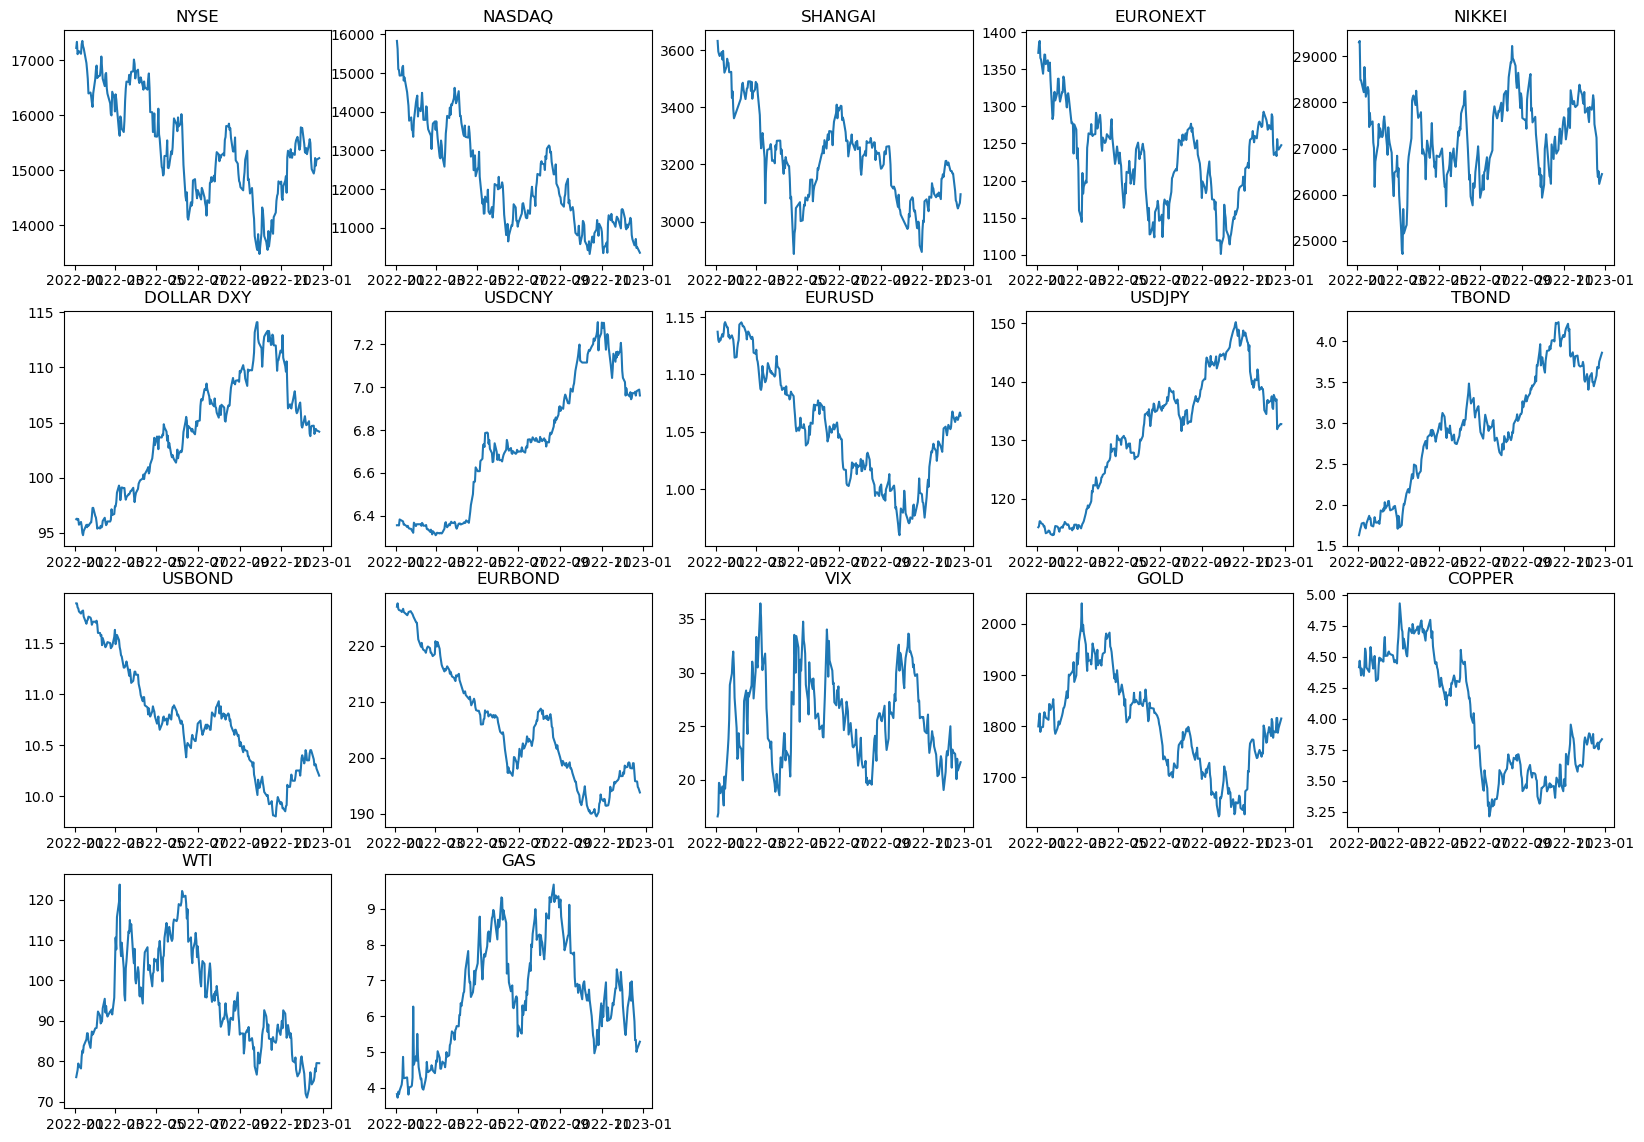

In [19]:
#We proceed to plot the different assets prices movements and try to see if there is any correlation between them
plt.figure(figsize=(20,14))
for i, asset in enumerate(asset_list,1):
    plt.subplot(4, 5, i)
    df1=df[df['ticker']==asset]
    plt.plot(df1['Date'],df1['Close'])
    plt.title(asset)

In [20]:
#We can see that NYSE,NASDAQ,SHANGAI,EURONEXT and NIKKEI have a positive correlation between them.
#Also, Dollar Index(DXY) and Treasury Bond (TBOND) have similar correlation between them and this 2 have a negative correlation with the different stock markets.

In [21]:
# Now let's plot the total volume of each asset being traded each day

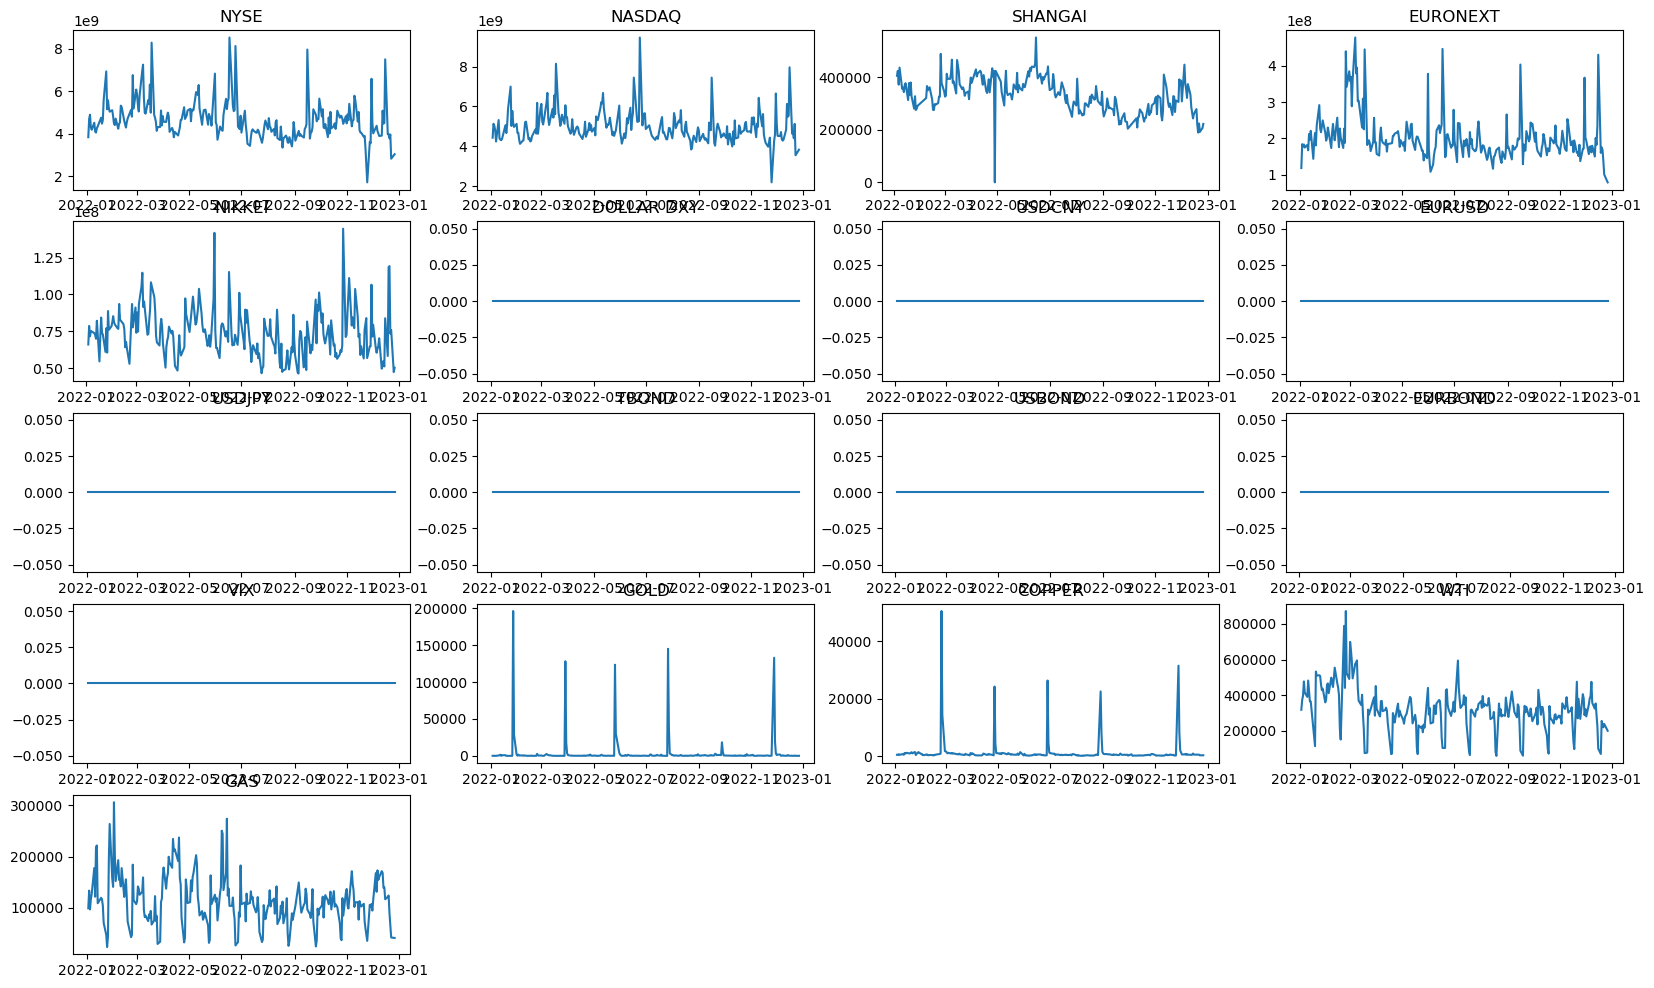

In [22]:
# We can observe that the volume doesn´t give us any relevant information.
# The volume is only available for stock markets and commodities.
# There is no correlation between our  commodities and the stock markets.

plt.figure(figsize=(20,12))
for i, asset in enumerate(asset_list,1):
    plt.subplot(5, 4, i)
    df1=df[df['ticker']==asset]
    plt.plot(df1['Date'],df1['Volume'])
    plt.title(asset)

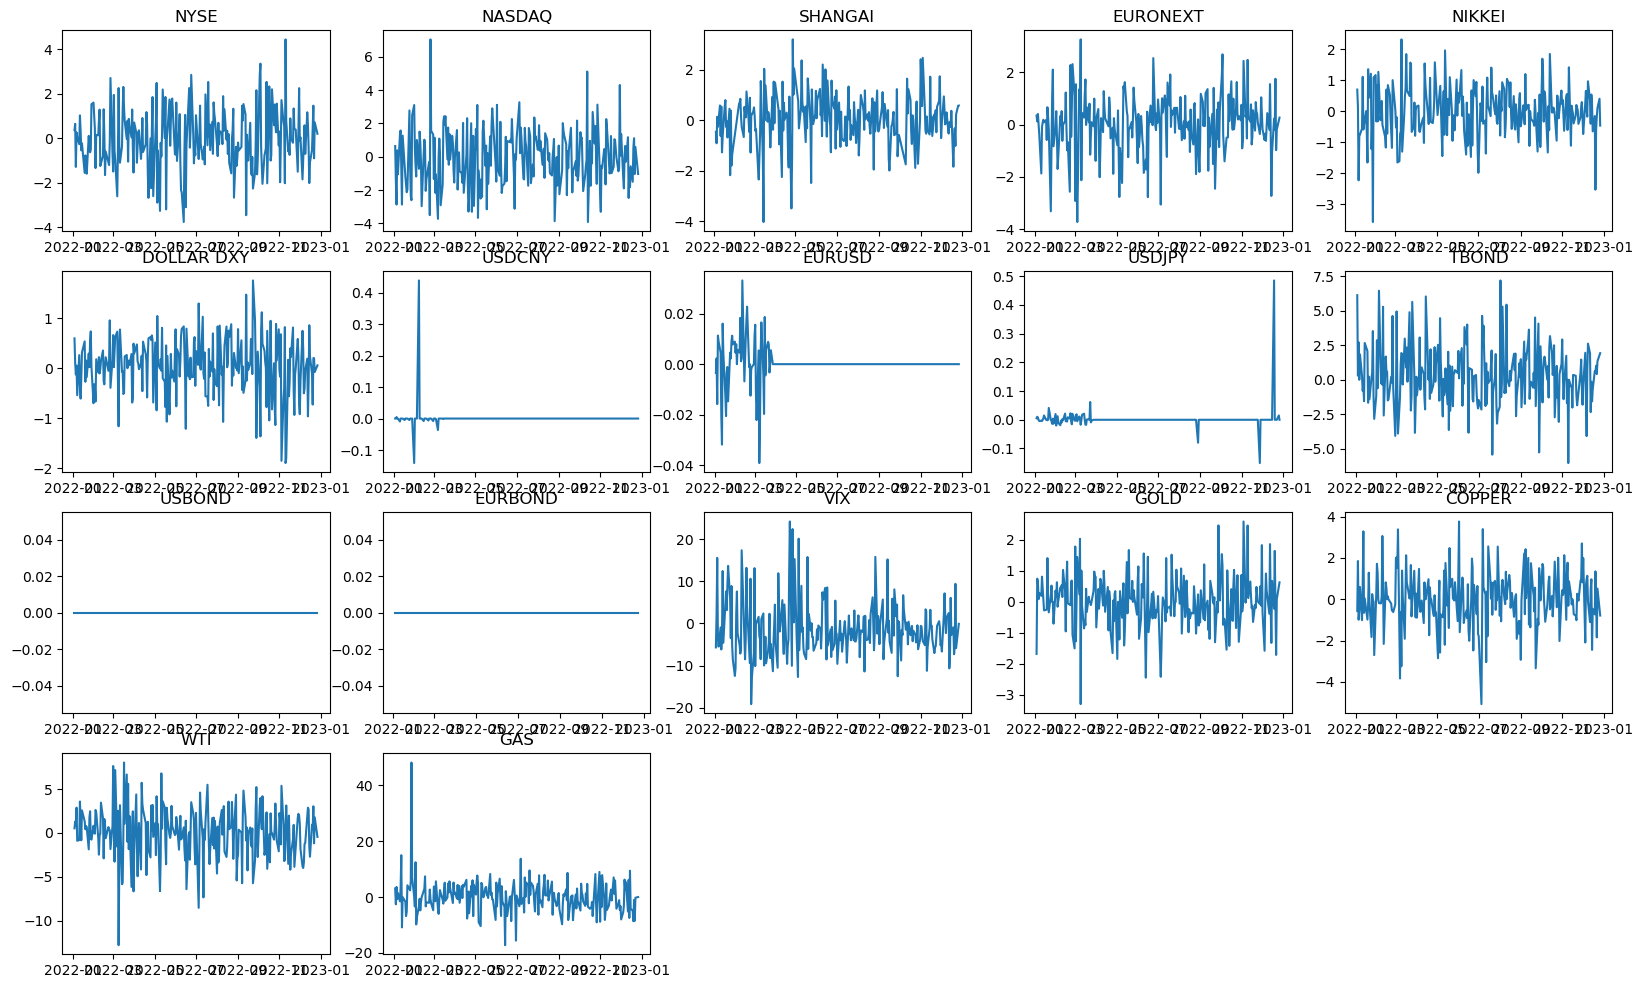

In [23]:
#Let´s see the daily return of each asset measured in %

plt.figure(figsize=(20,12))
for i, asset in enumerate(asset_list,1):
    plt.subplot(4, 5, i)
    df1=df[df['ticker']==asset]
    plt.plot(df1['Date'],df1['Daily Return'])
    plt.title(asset)

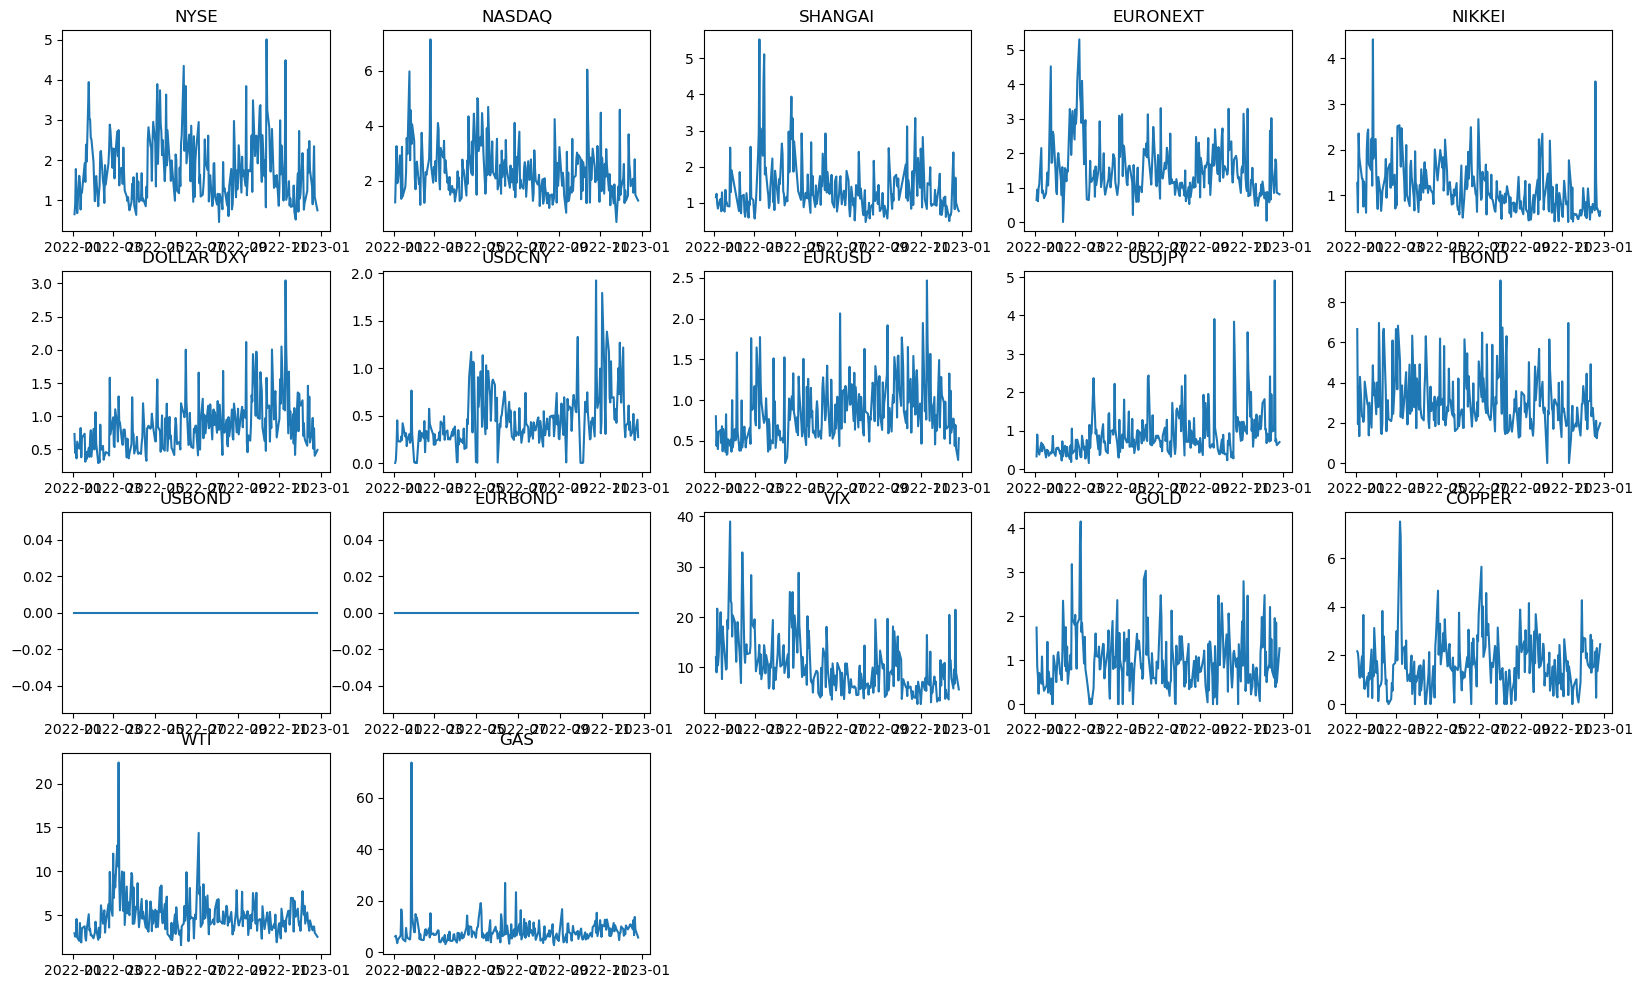

In [24]:
#Let´s see the intra-daily volatility of each asset measured in %

plt.figure(figsize=(20,12))
for i, asset in enumerate(asset_list,1):
    plt.subplot(4, 5, i)
    df1=df[df['ticker']==asset]
    plt.plot(df1['Date'],df1['Daily Volatility'])
    plt.title(asset)

In [25]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return,Daily Volatility
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE,0.361036,0.648365
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE,0.642398,0.878493
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE,-1.292976,1.774423
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE,0.256653,1.122823
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE,0.056887,0.675560
...,...,...,...,...,...,...,...,...,...,...
4238,2022-12-20,5.832000,5.906000,5.256000,5.326000,5.326000,123996,GAS,-8.676262,12.366821
4239,2022-12-21,5.389000,5.609000,5.265000,5.332000,5.332000,89444,GAS,-1.057713,6.533720
4240,2022-12-22,5.465000,5.653000,4.975000,4.999000,4.999000,66757,GAS,-8.526991,13.628140
4241,2022-12-23,5.093000,5.245000,4.825000,5.079000,5.079000,42105,GAS,-0.274886,8.704665


In [26]:
df.to_csv('ticker.csv')

In [27]:
#Comparing performance of 3 stock Markets: total returns
#Now we'll compare total returns for a number of tickers that had interesting price movements during the last year. 
#We'll start with 2022-01-01.

In [28]:
pip install requests-cache

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Cache API calls
import requests_cache

In [30]:
session = requests_cache.CachedSession("yfinance.cache")
session.headers["User-Agent"] = "prices-notebook/1.0"

# Realty Income Corporation, a REIT
o = yf.Ticker("O", session=session)

In [31]:
def compare_total_returns(symbols, start, end, title):
    cols = []
    for symbol in symbols:
        ticker = yf.Ticker(symbol, session=session)
        hist_df = ticker.history(start=start, end=end, auto_adjust=False, back_adjust=False)
        cols.append(hist_df["Adj Close"].rename(symbol))
    comb_df = pd.concat(cols, axis=1)
    norm_df = comb_df.div(comb_df.iloc[0])
    norm_df.plot(title=title, figsize=(5, 3))
    plt.show()

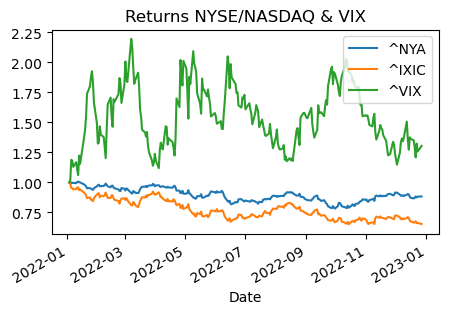

In [32]:
symbols = [
    "^NYA",
    "^IXIC",
    "^VIX",
]
compare_total_returns(symbols, "2022-01-01", "2022-12-28", "Returns NYSE/NASDAQ & VIX")

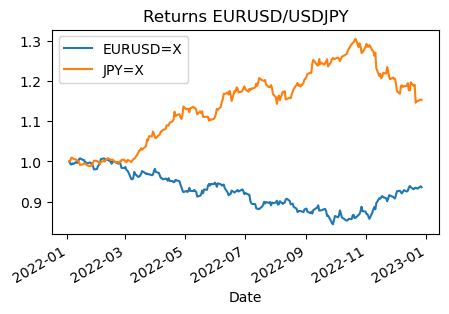

In [33]:
symbols = [
    "EURUSD=X",
    "JPY=X",
]
compare_total_returns(symbols, "2022-01-01", "2022-12-28", "Returns EURUSD/USDJPY")

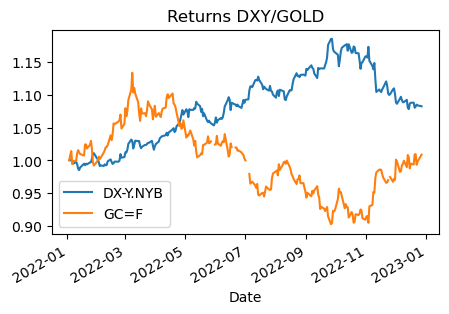

In [34]:
symbols = [
    "DX-Y.NYB",
    "GC=F",
]
compare_total_returns(symbols, "2022-01-01", "2022-12-28", "Returns DXY/GOLD")

In [35]:
#S&P 500(^GSPC) // Type: Stock Market

#Dow Jones Industrial Average(^DJI) // Type: Stock Market

#Nasdaq Composite(^IXIC) // Type: Stock Market

#DOLLAR INDEX(DX-Y.NYB) // Type: Currency Index

#EURO/USD(EURUSD=X) // Type: Currency 

#USD/JPY (JPY=X) // Type: Currency

#10TREASURY BOND(^TNX) : Treasury Bill Rates as Proxies for Expected Inflation // Type: BOND 

#VOLATILITY INDEX(^VIX) // Index

#GOLD(GC=F) // Commodity

#CRUDE OIL WTI(MCL=F) // Commodity

In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return,Daily Volatility
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE,0.361036,0.648365
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE,0.642398,0.878493
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE,-1.292976,1.774423
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE,0.256653,1.122823
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE,0.056887,0.675560
...,...,...,...,...,...,...,...,...,...,...
4238,2022-12-20,5.832000,5.906000,5.256000,5.326000,5.326000,123996,GAS,-8.676262,12.366821
4239,2022-12-21,5.389000,5.609000,5.265000,5.332000,5.332000,89444,GAS,-1.057713,6.533720
4240,2022-12-22,5.465000,5.653000,4.975000,4.999000,4.999000,66757,GAS,-8.526991,13.628140
4241,2022-12-23,5.093000,5.245000,4.825000,5.079000,5.079000,42105,GAS,-0.274886,8.704665


In [37]:
print(df["ticker"].unique())

['NYSE' 'NASDAQ' 'SHANGAI' 'EURONEXT' 'NIKKEI' 'DOLLAR DXY' 'USDCNY'
 'EURUSD' 'USDJPY' 'TBOND' 'USBOND' 'EURBOND' 'VIX' 'GOLD' 'COPPER' 'WTI'
 'GAS']


In [38]:
# We give our Data more information, creating a new column called Risk(This will help us for the graphs in tableau).

In [39]:
def categorize(row):
    if (row['ticker'] == 'NYSE') | (row['ticker'] == 'NASDAQ') | (row['ticker'] == 'SHANGAI') | (row['ticker'] == 'EURONEXT') | (row['ticker'] == 'NIKKEI') | (row['ticker'] == 'VIX'):
        return 'High Risk '
    elif (row['ticker'] == 'USDCNY') | (row['ticker'] == 'EURUSD') | (row['ticker'] == 'USDJPY')| (row['ticker'] == 'COPPER') | (row['ticker'] == 'WTI')| (row['ticker'] == 'GAS'):
        return 'Medium Risk'
    else:
        return 'Low Risk'
 
df['Risk'] = df.apply(categorize, axis=1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return,Daily Volatility,Risk
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE,0.361036,0.648365,High Risk
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE,0.642398,0.878493,High Risk
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE,-1.292976,1.774423,High Risk
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE,0.256653,1.122823,High Risk
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE,0.056887,0.675560,High Risk


In [40]:
#Check the column values
print(df["Risk"].unique())

['High Risk ' 'Low Risk' 'Medium Risk']


In [41]:
# We give our Data more information, creating a new column called Asset Class(This will help us for the graphs in tableau).

In [42]:
def categorize(row):
    if (row['ticker'] == 'NYSE') | (row['ticker'] == 'NASDAQ') | (row['ticker'] == 'SHANGAI') | (row['ticker'] == 'EURONEXT') | (row['ticker'] == 'NIKKEI') :
        return 'Stock Market '
    elif (row['ticker'] == 'EURUSD') | (row['ticker'] == 'USDJPY') | (row['ticker'] == 'DOLLAR DXY') | (row['ticker'] == 'USDCNY') :
        return 'Currency'
    elif (row['ticker'] == 'GOLD') | (row['ticker'] == 'COPPER') | (row['ticker'] == 'WTI') | (row['ticker'] == 'GAS') :
        return 'Commodities'
    elif (row['ticker'] == 'TBOND') | (row['ticker'] == 'USBOND') | (row['ticker'] == 'EURBOND') :
        return 'Bond'
    else:
        return 'Other'
 
df['Asset Class'] = df.apply(categorize, axis=1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return,Daily Volatility,Risk,Asset Class
0,2022-01-03,17164.130859,17230.990234,17119.990234,17226.099609,17226.099609,3831020000,NYSE,0.361036,0.648365,High Risk,Stock Market
1,2022-01-04,17226.099609,17377.429688,17226.099609,17336.759766,17336.759766,4683170000,NYSE,0.642398,0.878493,High Risk,Stock Market
2,2022-01-05,17336.759766,17415.609375,17111.970703,17112.599609,17112.599609,4887960000,NYSE,-1.292976,1.774423,High Risk,Stock Market
3,2022-01-06,17112.599609,17240.390625,17048.960938,17156.519531,17156.519531,4295280000,NYSE,0.256653,1.122823,High Risk,Stock Market
4,2022-01-07,17156.519531,17222.900391,17107.330078,17166.279297,17166.279297,4181510000,NYSE,0.056887,0.675560,High Risk,Stock Market


In [43]:
#Check the column values
print(df["Asset Class"].unique())

['Stock Market ' 'Currency' 'Bond' 'Other' 'Commodities']


In [44]:
# save to csv
#df.to_csv('ticker.csv')

In [45]:
#MIN MAX SCALER
#We scale only some columns, this is because in tableau we want the graphs to be comparaised correctly.
#All of them unless the returns %

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

In [47]:
df[["Open","High","Low","Close","Adj Close","Volume"]] = minmax_scale(df[["Open","High","Low","Close","Adj Close","Volume"]])

In [48]:
dscale1 = df
dscale1

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Daily Return,Daily Volatility,Risk,Asset Class
0,2022-01-03,0.586017,0.586311,0.586198,0.587263,0.587263,0.404623,NYSE,0.361036,0.648365,High Risk,Stock Market
1,2022-01-04,0.588133,0.591294,0.589832,0.591036,0.591036,0.494625,NYSE,0.642398,0.878493,High Risk,Stock Market
2,2022-01-05,0.591911,0.592593,0.585924,0.583394,0.583394,0.516254,NYSE,-1.292976,1.774423,High Risk,Stock Market
3,2022-01-06,0.584257,0.586630,0.583766,0.584891,0.584891,0.453657,NYSE,0.256653,1.122823,High Risk,Stock Market
4,2022-01-07,0.585757,0.586035,0.585765,0.585224,0.585224,0.441641,NYSE,0.056887,0.675560,High Risk,Stock Market
...,...,...,...,...,...,...,...,...,...,...,...,...
4238,2022-12-20,0.000166,0.000168,0.000147,0.000149,0.000149,0.000013,GAS,-8.676262,12.366821,Medium Risk,Commodities
4239,2022-12-21,0.000151,0.000158,0.000148,0.000149,0.000149,0.000009,GAS,-1.057713,6.533720,Medium Risk,Commodities
4240,2022-12-22,0.000154,0.000159,0.000138,0.000138,0.000138,0.000007,GAS,-8.526991,13.628140,Medium Risk,Commodities
4241,2022-12-23,0.000141,0.000146,0.000133,0.000140,0.000140,0.000004,GAS,-0.274886,8.704665,Medium Risk,Commodities


In [49]:
#Save the data
dscale1.to_csv('dscale3.csv')